## import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



## Loading the data

In [7]:
file_path ='/Users/BushraAsiri/Downloads/heart_failure_clinical_records_dataset.csv'

In [8]:
df = pd.read_csv(file_path)
##display the top 5 data records
df.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Problem Statement:
Cardiovascular diseases (CVDs) are the leading cause of death globally, with heart failure being a common consequence of these diseases. This dataset aims to explore the relationship between clinical and demographic features and mortality caused by heart failure. The objective is to identify key factors contributing to mortality and use machine learning models to predict survival outcomes, thereby improving early detection and management strategies for high-risk patients.


### Exploratory Data Analysis

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [16]:
# convert age and platelets to integer
df['age'] = df['age'].astype(int)
df['platelets'] = df['platelets'].astype(int)


In [18]:
#get the shape of the data (number of row and columns)
df.shape 

(299, 13)

In [20]:
df.columns #get name the columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [22]:
 # Check for missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [24]:
print(df.nunique())

age                          46
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64


In [27]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,299.0,60.829431,11.894997,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.026756,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Numerical variables visualization using histograms

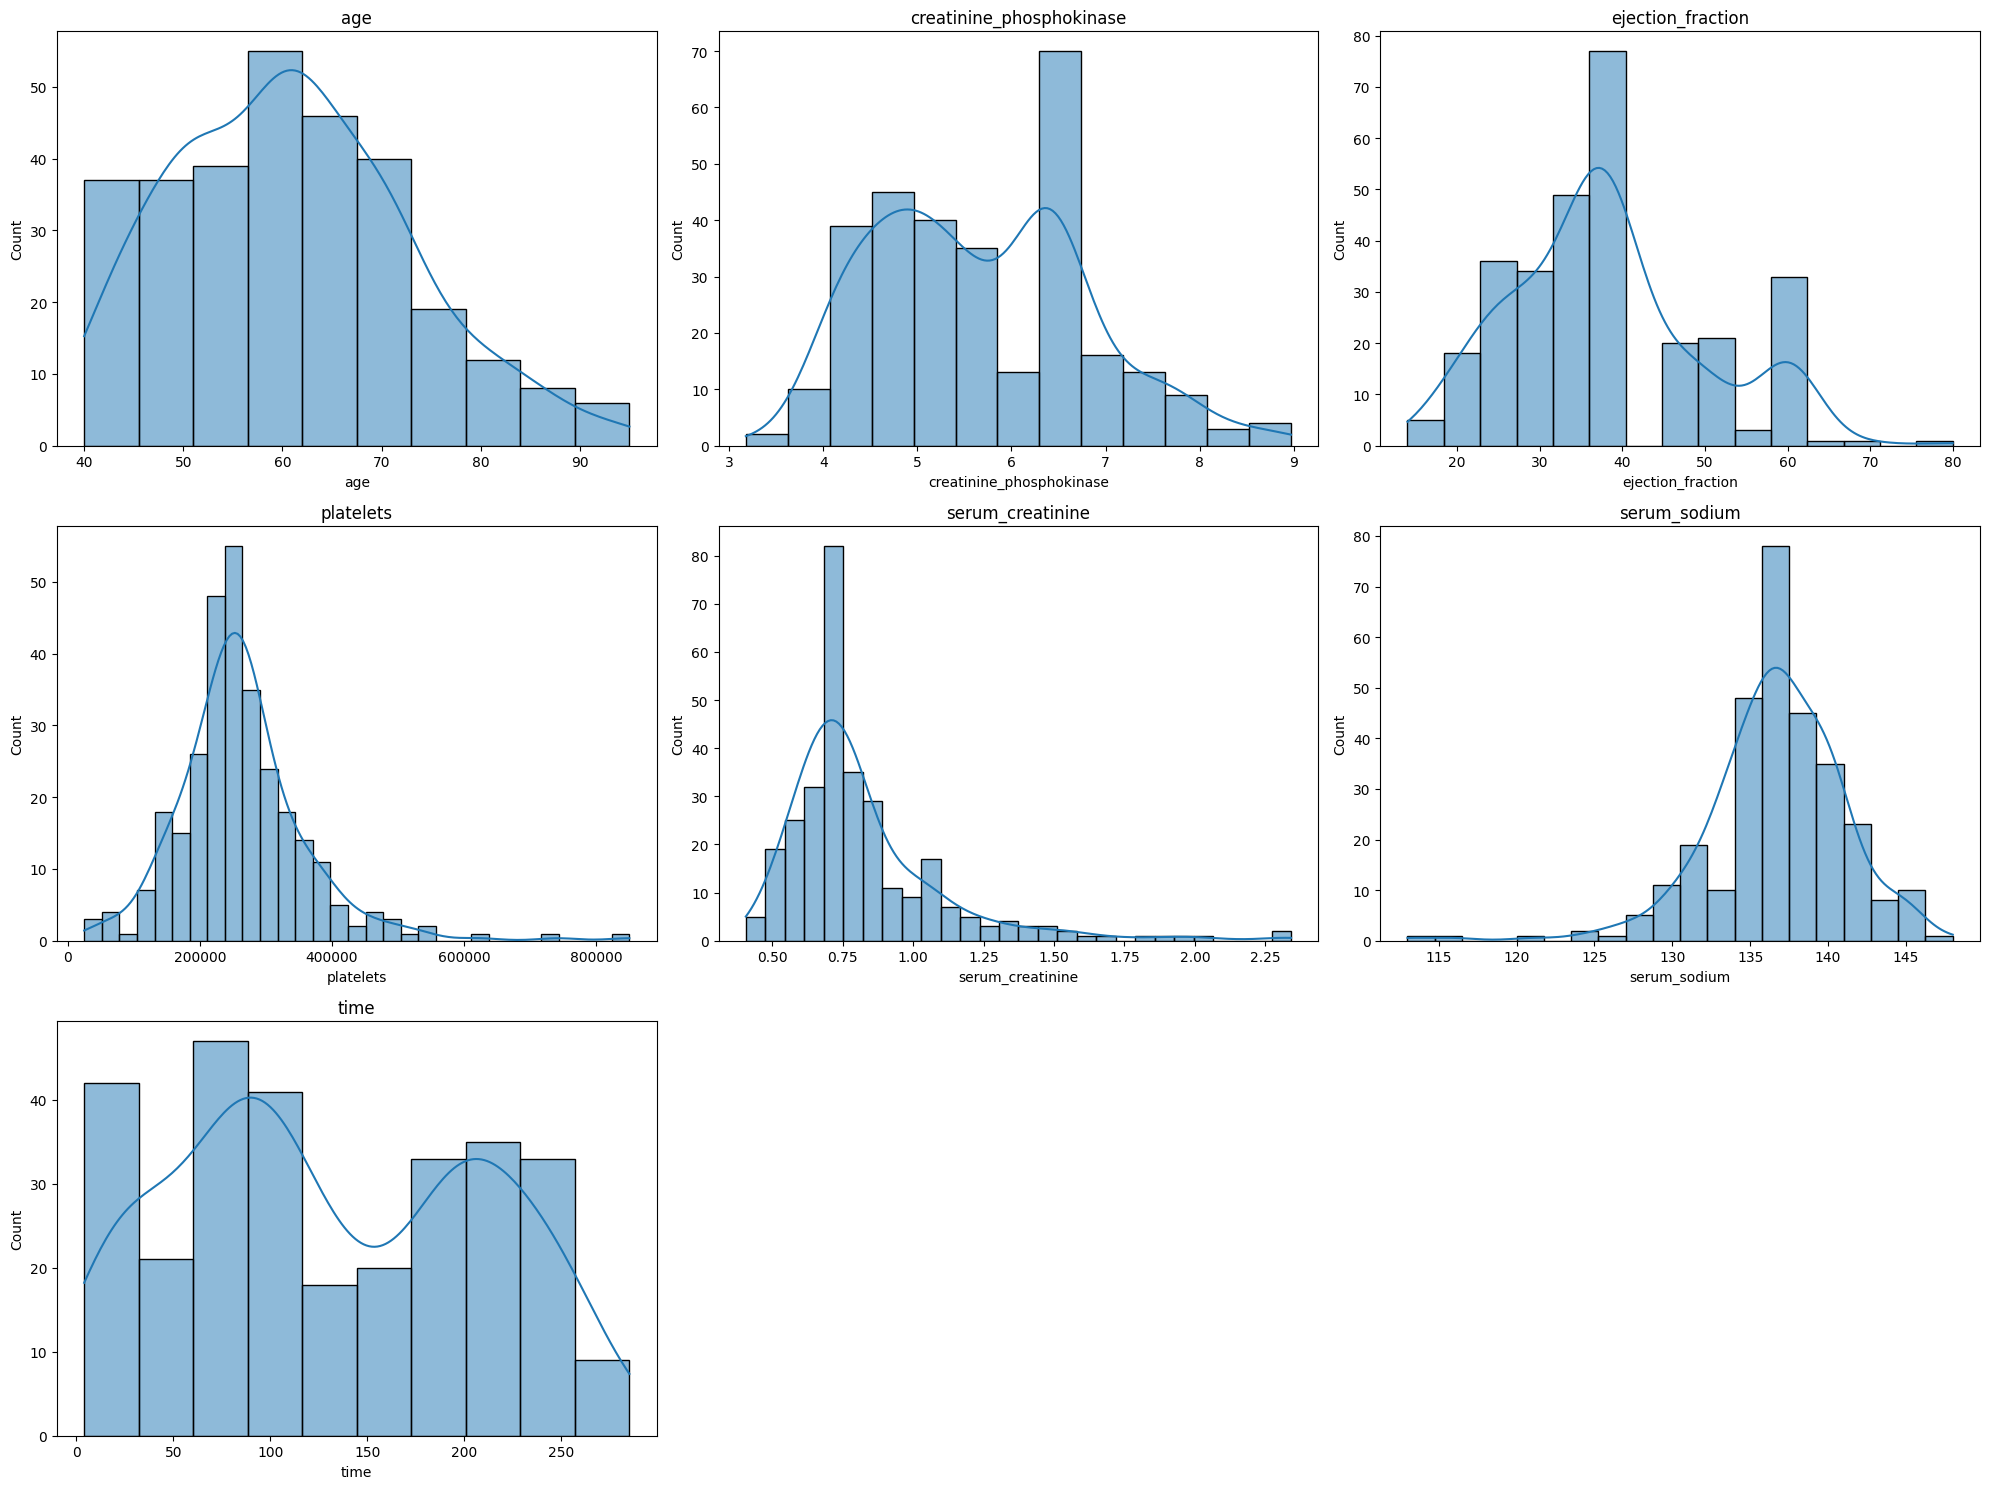

In [35]:
# Numerical variables for visualization
numerical_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

plt.figure(figsize=(20, 15))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(var)

plt.tight_layout()
plt.show()

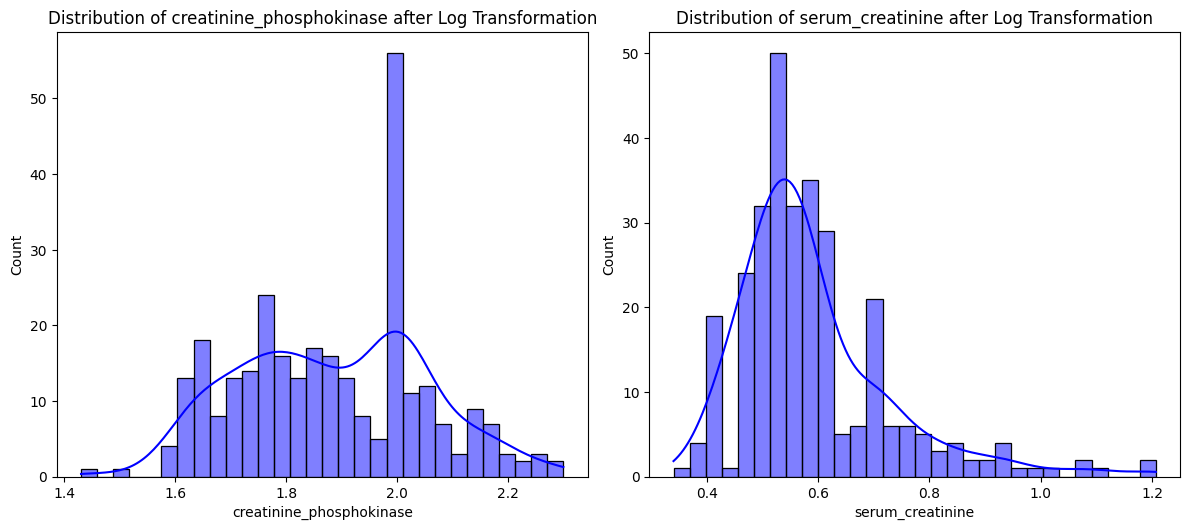

In [36]:
#apply the log transformation
columns_to_log = ['creatinine_phosphokinase', 'serum_creatinine']

for col in columns_to_log:
    df[col] = np.log1p(df[col])  # log1p is applied to aviod issues with zero values by adding 1 

# distribution after the log transformation
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns_to_log, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col} after Log Transformation')
plt.tight_layout()
plt.show()

### Categorical variables visualization using bar charts

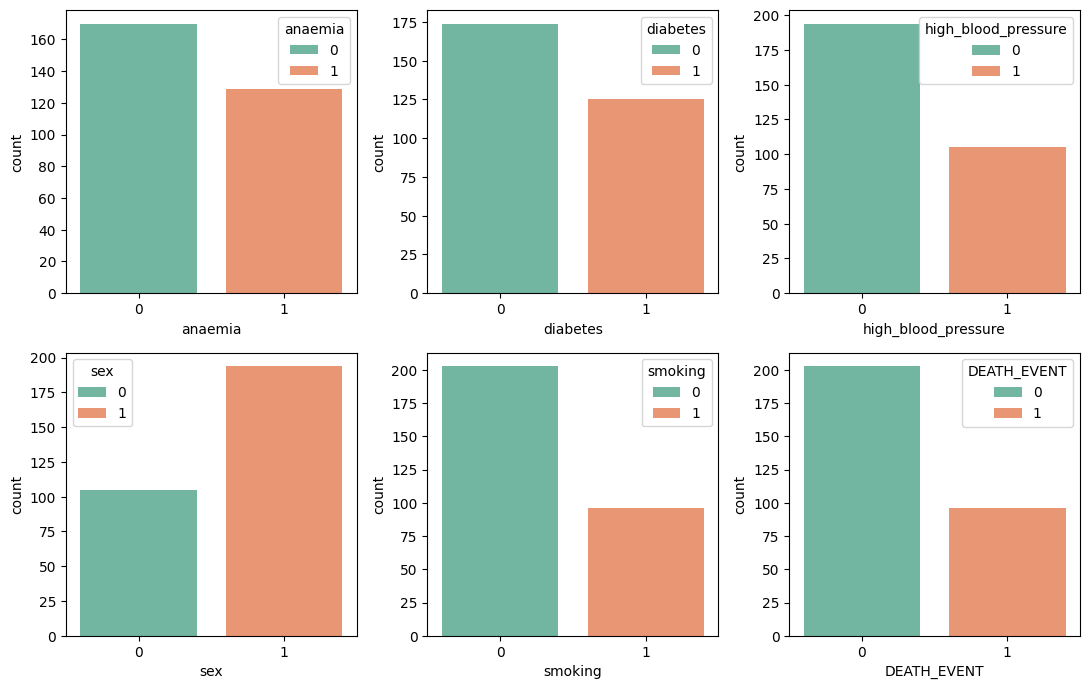

In [41]:
#Define a list of categorical variables to plot
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

# Create a 2 * 3 grid of subplots 
fig, axes = plt.subplots(2, 3, figsize=(11, 7))  
axes = axes.flatten() 

# Loop through each categorical variable and create bar chart
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df, ax=axes[i], hue=var, palette='Set2')  # hue لتحديد الفئات و palette لاختيار الألوان
    

# show plot
plt.tight_layout()
plt.show()


### relationship  between numerical variable VS DEATH_EVENT

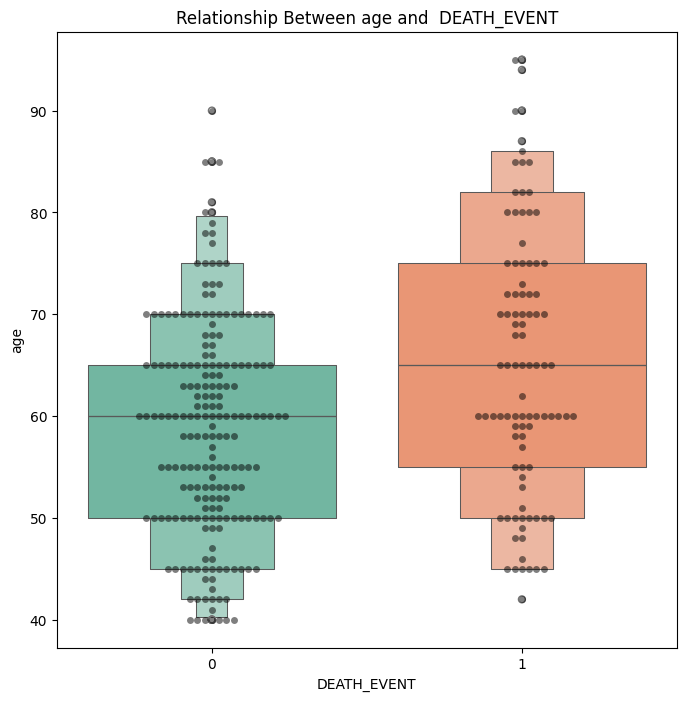

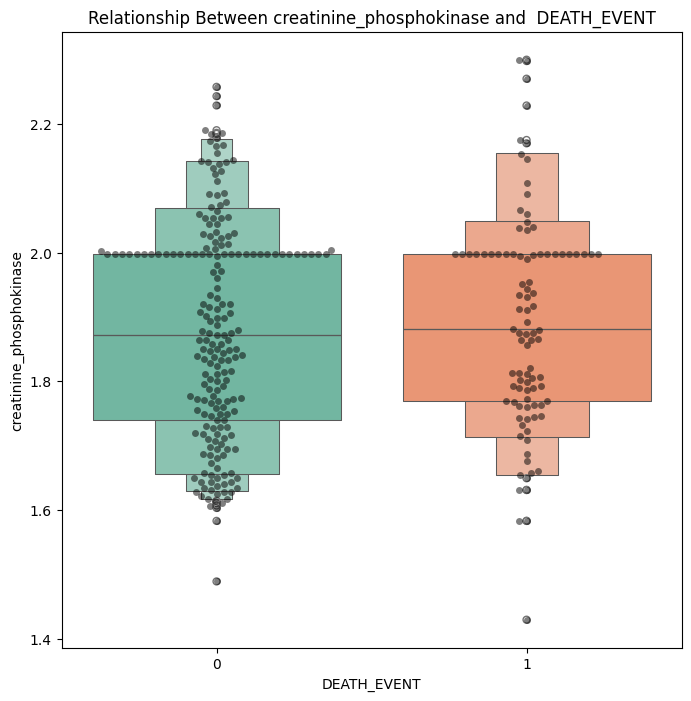

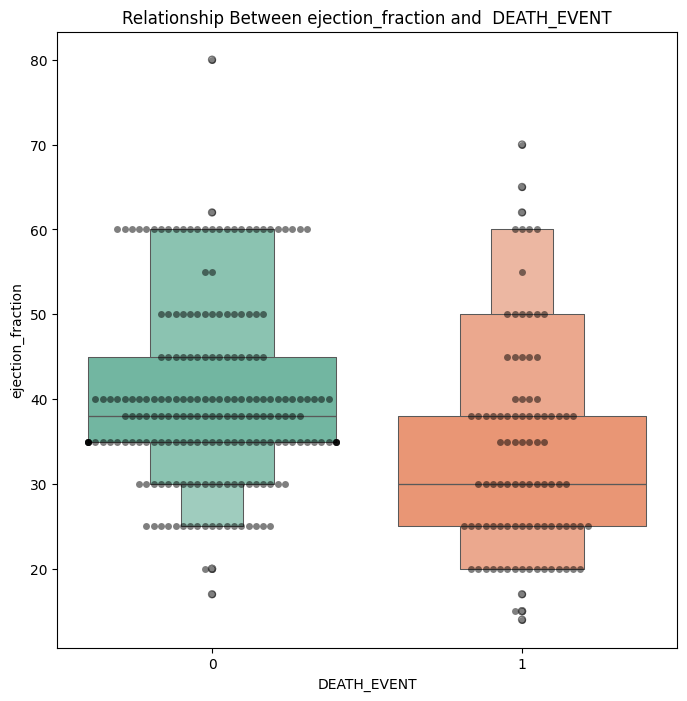

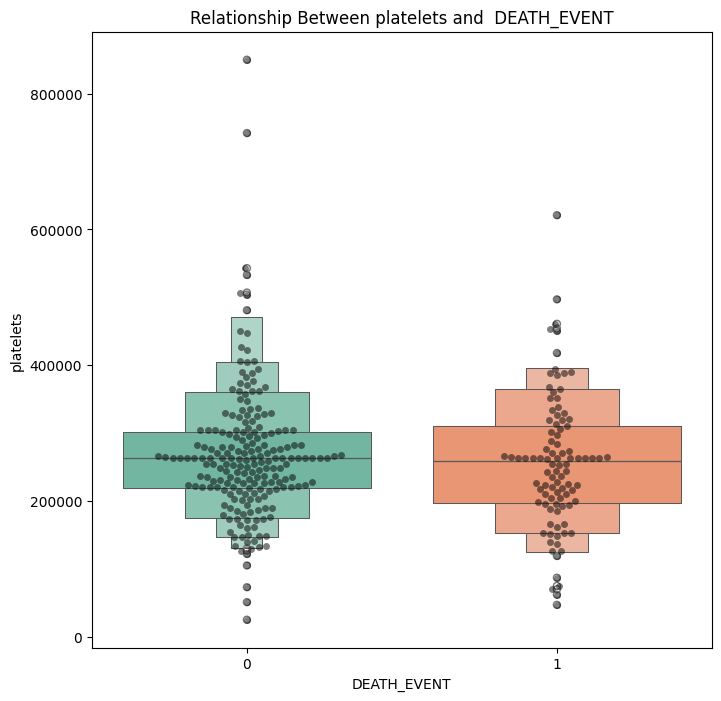

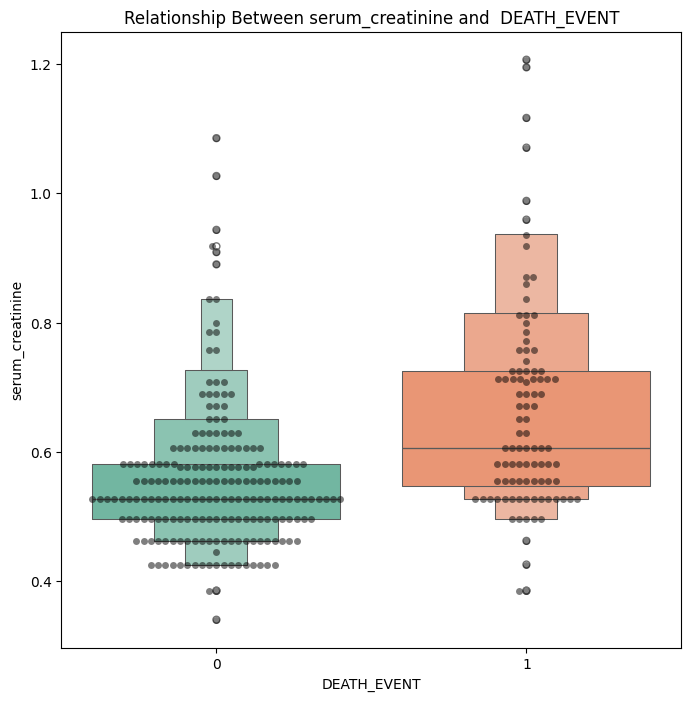

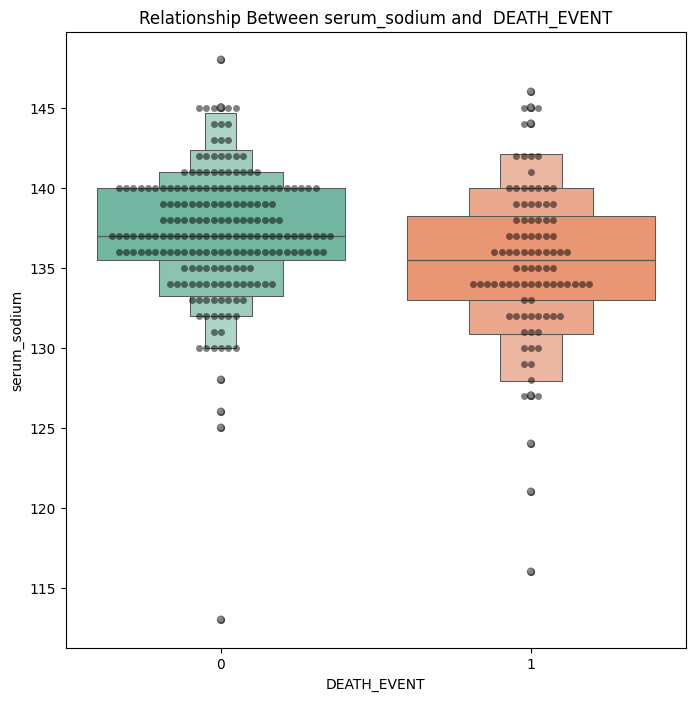

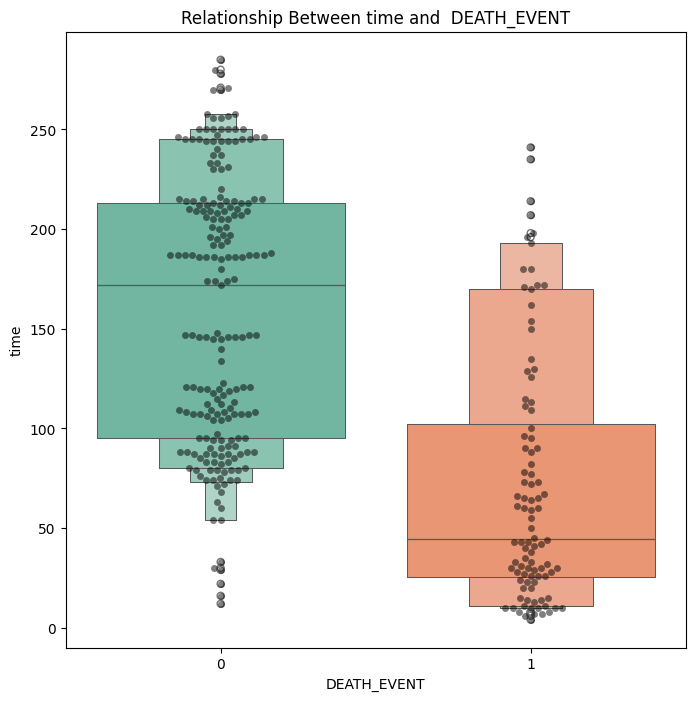

In [44]:

# Loop through numerical variables to visualize their relationship with DEATH_EVENT
for i in numerical_vars:
    plt.figure(figsize=(8, 8))## set plot size 
    sns.swarmplot(x=df["DEATH_EVENT"], y=df[i], color='black', alpha=0.5)# Show individual data points
    sns.boxenplot(x=df["DEATH_EVENT"], y=df[i], hue=df["DEATH_EVENT"], palette='Set2', legend=False)#show distribution
    plt.title(f'Relationship Between {i} and  DEATH_EVENT')# add title
    plt.xlabel("DEATH_EVENT")
    plt.ylabel(i)
    plt.show()




### relationship between category vs DEATH_EVENT

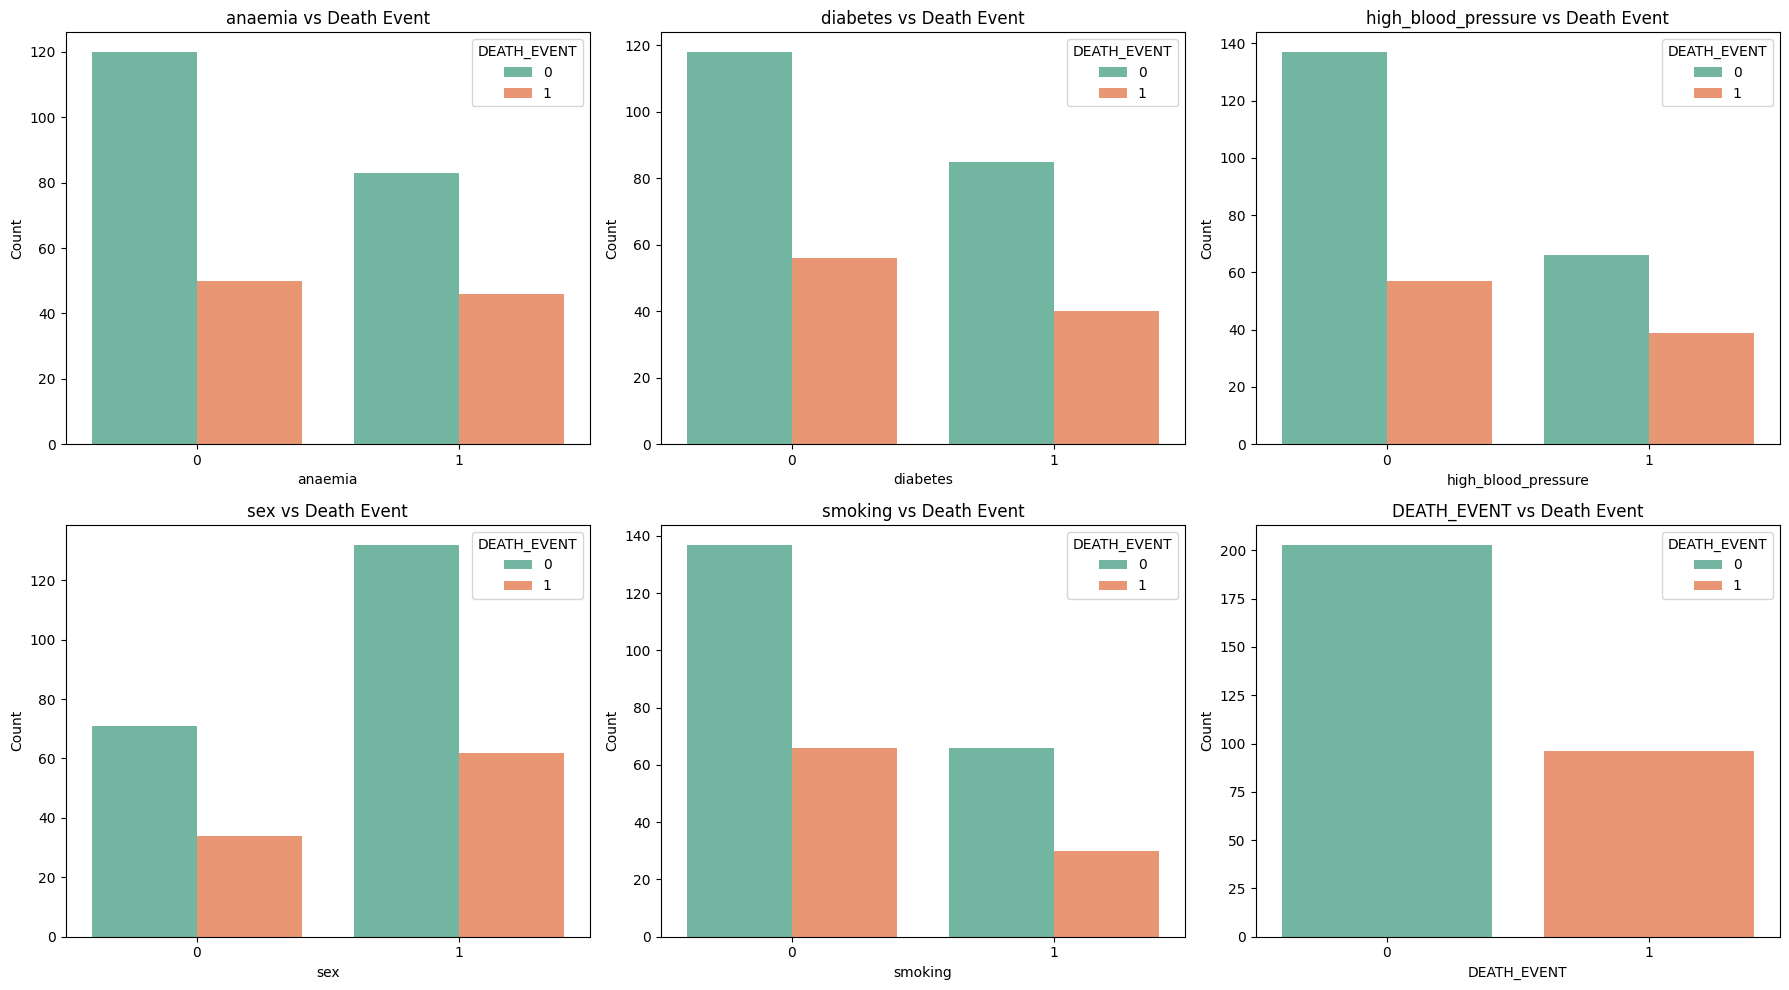

In [49]:
#Create a 2x3 grid of subplots with a figure size of (18, 10)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
axes = axes.flatten()


## Loop through each categorical variable and create a count plot
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='DEATH_EVENT', data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{var} vs Death Event')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')


# show plot
plt.tight_layout()
plt.show()





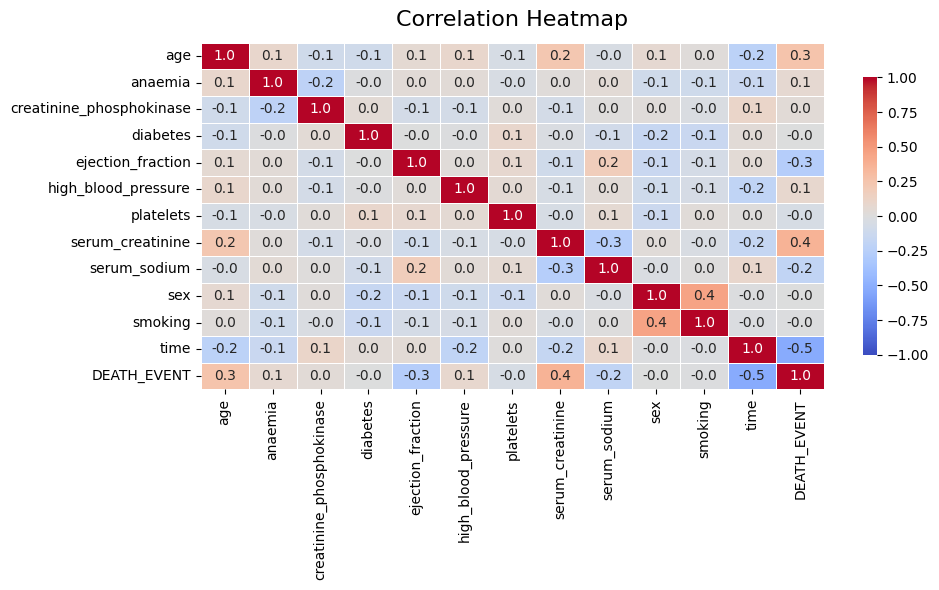

In [50]:
# Compute correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include='number').corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cmap='coolwarm',
    cbar_kws={'shrink': 0.8},
    vmin=-1,
    vmax=1,
    ax=ax
)
ax.set_title('Correlation Heatmap', fontsize=16, pad=12)
plt.tight_layout()
plt.show()


Accuracy: 0.75
Confusion Matrix:
 [[33  2]
 [13 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



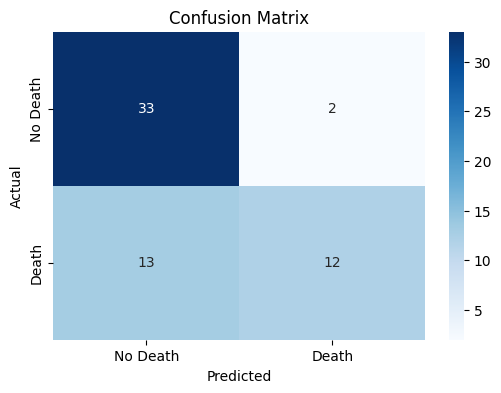

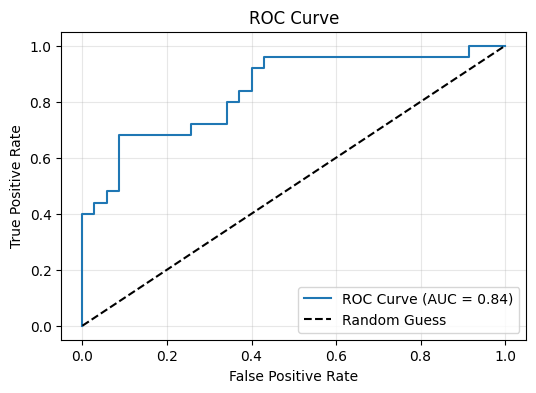

In [55]:


# Features and target
features = ["time", "serum_creatinine", "age", "ejection_fraction","serum_sodium"]
X = df[features]
y = df["DEATH_EVENT"]

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Death', 'Death'], yticklabels=['No Death', 'Death'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualization: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


## Conclusion

## The model achieved moderate performance with an accuracy of 75%. Key features like time, ejection_fraction, serum_sodium, serum_creatinine, and age had a strong impact on predictions. However, the model performs better at predicting “No Death” cases than “Death” cases, suggesting a need for improvement, possibly by addressing class imbalance or incorporating additional relevant features.